# **03. Multiclass classification : Using Reuters dataset as example**

**Topic**: Classify the topics of News.

### **Step 1: Loading data**

the dataset is included in Keras

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) 

Using TensorFlow backend.
/home/mrm412/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mrm412/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mrm412/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mrm412/anacond

In [2]:
print("Train data : ",train_data.shape)
print("Train labels : ",train_labels.shape)
print("Test data : ",test_data.shape)
print("Test labels : ",test_labels.shape)

Train data :  (8982,)
Train labels :  (8982,)
Test data :  (2246,)
Test labels :  (2246,)


In [3]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


0 is for negative; 1 is for positive.

In [4]:
print('The label for comments :',train_labels[0])

The label for comments : 3


### **Step 2: Decoding the data**

In [5]:
# get the word index dictionat from builtin dataset
word_index = reuters.get_word_index()

# build the dictiionary reversing the ID to word
reverse_word_index = dict( [(value,key) for (key,value) in word_index.items()] )

# reverse the index list to sentences, using first comment comments as example
# Hint: dictionary.get(你的key word, 當 dictionay 查不到時要替換的值)
decoded_data = ' '.join( [reverse_word_index.get(words_index-3, '?') for words_index in train_data[0]] )
print(decoded_data)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


### **Step 3: Perpare the data**

#### **data**

In [6]:
import numpy as np

def one_hot_encoding_data(data, dimension=10000):
    results = np.zeros( (len(data),dimension) )
    for i,sentences in enumerate(data):
        results[i, sentences] = 1
    return results
    
x_train = one_hot_encoding_data(train_data)
x_test = one_hot_encoding_data(test_data)

In [7]:
print('Train data: ', x_train[1])
print("Train data shape: ",x_train.shape)

Train data:  [0. 1. 1. ... 0. 0. 0.]
Train data shape:  (8982, 10000)


#### **label**

在 keras 中有一個內建的 one hot encoding function ，這樣我們就不用寫 function 了

In [8]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels) 
one_hot_test_labels = to_categorical(test_labels)

In [9]:
print('Test data: ', one_hot_train_labels[1])
print("Test data shape: ",one_hot_train_labels.shape)

Test data:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Test data shape:  (8982, 46)


### **Step 4: Build Network**

多類別的輸出層所使用的 activation function 應為 "softmax"

那麼 softmax 和 sigmoid 差在哪裡呢，都是同為 0 ~ 1 的分佈？

差別在於它的分佈，softmax 為多項分佈，也就是說所有種類(輸出)的機率相加為 1 ，多用於 Multi Class

然而 sigmoid 為伯努利分佈，每個種類的可能性為獨立的，也就是說相加不一定為 1 ，多用於 Binary Class

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


### **Step 5: Define the way to Compile**

In [11]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [12]:
# If you want to change the parameters of optimizer or metrics, you can import it from keras
# from keras import optimizers
# from keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
#               loss='binary_crossentropy',
#               metrics=[metrics.binary_accuracy])

### **Step 6: Prepare the validation data**

In [13]:
x_val = x_train[:1000]
y_val = one_hot_train_labels[:1000]

partial_x_train = x_train[1000:]
partial_y_train = one_hot_train_labels[1000:]

### **Step 7: Fit the data to model**

In [14]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 159us/step - loss: 2.5684 - acc: 0.4721 - val_loss: 1.6805 - val_acc: 0.6390
Epoch 2/20
7982/7982 [==============================] - 0s 55us/step - loss: 1.3964 - acc: 0.7033 - val_loss: 1.2947 - val_acc: 0.7100
Epoch 3/20
7982/7982 [==============================] - 0s 55us/step - loss: 1.0529 - acc: 0.7734 - val_loss: 1.1370 - val_acc: 0.7500
Epoch 4/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.8323 - acc: 0.8216 - val_loss: 1.0454 - val_acc: 0.7720
Epoch 5/20
7982/7982 [==============================] - 0s 56us/step - loss: 0.6692 - acc: 0.8603 - val_loss: 0.9953 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 0s 54us/step - loss: 0.5389 - acc: 0.8885 - val_loss: 0.9328 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 0s 52us/step - loss: 0.4364 - acc: 0.9087 - val_loss: 0.9171 - val_acc: 0.8020
Epoch 

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### **Step 8: Draw the training history**

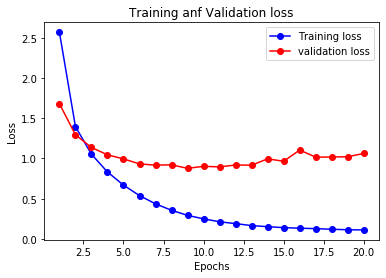

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo-', label='Training loss')
plt.plot(epochs, val_loss_values, 'ro-', label='validation loss')
plt.title('Training anf Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

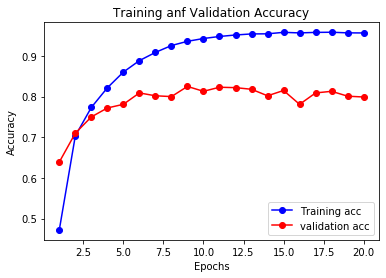

In [17]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc_values, 'bo-', label='Training acc')
plt.plot(epochs, val_acc_values, 'ro-', label='validation acc')
plt.title('Training anf Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

目測下來，第 9 週期比較好，那我們就訓練到第 9 週期，那在重訓練一次吧

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) 

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))

history_dict = history.history
history_dict.keys()

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 67us/step - loss: 2.6838 - acc: 0.4663 - val_loss: 1.7961 - val_acc: 0.6480
Epoch 2/9
7982/7982 [==============================] - 0s 40us/step - loss: 1.4603 - acc: 0.6998 - val_loss: 1.3237 - val_acc: 0.7200
Epoch 3/9
7982/7982 [==============================] - 0s 40us/step - loss: 1.0617 - acc: 0.7746 - val_loss: 1.1287 - val_acc: 0.7580
Epoch 4/9
7982/7982 [==============================] - 0s 41us/step - loss: 0.8260 - acc: 0.8241 - val_loss: 1.0464 - val_acc: 0.7730
Epoch 5/9
7982/7982 [==============================] - 0s 40us/step - loss: 0.6526 - acc: 0.8649 - val_loss: 0.9644 - val_acc: 0.7970
Epoch 6/9
7982/7982 [==============================] - 0s 40us/step - loss: 0.5197 - acc: 0.8936 - val_loss: 0.9288 - val_acc: 0.8110
Epoch 7/9
7982/7982 [==============================] - 0s 40us/step - loss: 0.4190 - acc: 0.9157 - val_loss: 0.9066 - val_acc: 0.8140
Epoch 8/9
7982

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

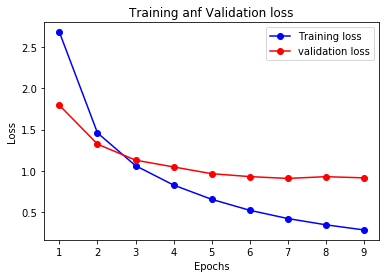

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo-', label='Training loss')
plt.plot(epochs, val_loss_values, 'ro-', label='validation loss')
plt.title('Training anf Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

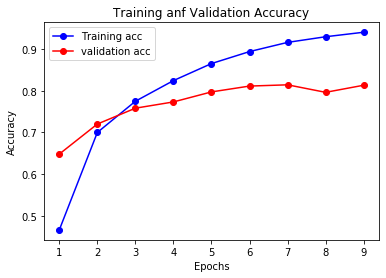

In [20]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc_values, 'bo-', label='Training acc')
plt.plot(epochs, val_acc_values, 'ro-', label='validation acc')
plt.title('Training anf Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### **Step 9: Evaluate and Predict the data**

In [21]:
results = model.evaluate(x_test, one_hot_test_labels)
print('acc : {} % ; loss : {}'.format(results[1]*100, results[0]))

2246/2246 [==============================] - 0s 102us/step
acc : 79.38557435440784 % ; loss : 0.9779925590525327


In [22]:
predicts = model.predict(x_test)
print(predicts)

[[4.7195481e-05 4.1322372e-04 1.5566238e-05 ... 6.4937958e-06
  2.1641413e-06 6.7683300e-07]
 [5.6256531e-03 1.2097573e-02 5.2307689e-05 ... 9.8119435e-06
  1.6229583e-06 2.3852315e-05]
 [1.1719717e-02 8.7837261e-01 4.0222533e-04 ... 7.4221753e-05
  7.8980322e-04 4.9087252e-05]
 ...
 [5.0026734e-05 2.2368679e-04 9.4380157e-05 ... 1.4618873e-04
  3.1944655e-06 1.3785864e-05]
 [2.2726115e-03 7.4616283e-02 3.5694907e-03 ... 4.8220372e-03
  2.8908890e-04 3.4422017e-04]
 [5.7785260e-03 5.2575433e-01 7.9223998e-03 ... 7.1630173e-04
  4.2414019e-04 2.5253321e-04]]


你會發現預測值是一個 array，他的長度為我們 model 的輸出層一樣，共 46 個，代表著在這 46 種 Topics 的可能性，我們想看實際的類別很簡單，就取 Max 值得 index 就好了

In [23]:
np.argmax(predicts[0])

3

In [24]:
predict_topics = [ np.argmax(i) for i in predicts ]
print(predict_topics[:10])

[3, 10, 1, 4, 13, 3, 3, 3, 3, 3]


### **Hint: Another way to label**

#### **label**

In [25]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

這邊我們在 label 這邊沒有使用 One hot encoding，而是直接紀錄它的 Topics 編號，但我們同時也要修改我們的 loss function，因為 categorical crossentropy 僅適用於 One hot encoding

In [26]:
y_test

array([ 3, 10,  1, ...,  3,  3, 24])

In [27]:
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) 

model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val,y_val))

history_dict = history.history
history_dict.keys()

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 65us/step - loss: 2.5945 - acc: 0.5105 - val_loss: 1.7242 - val_acc: 0.6440
Epoch 2/9
7982/7982 [==============================] - 0s 47us/step - loss: 1.4129 - acc: 0.7055 - val_loss: 1.2854 - val_acc: 0.7280
Epoch 3/9
7982/7982 [==============================] - 0s 47us/step - loss: 1.0440 - acc: 0.7799 - val_loss: 1.1130 - val_acc: 0.7650
Epoch 4/9
7982/7982 [==============================] - 0s 46us/step - loss: 0.8194 - acc: 0.8227 - val_loss: 1.0116 - val_acc: 0.7780
Epoch 5/9
7982/7982 [==============================] - 0s 44us/step - loss: 0.6565 - acc: 0.8598 - val_loss: 0.9733 - val_acc: 0.7910
Epoch 6/9
7982/7982 [==============================] - 0s 44us/step - loss: 0.5208 - acc: 0.8918 - val_loss: 0.9099 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 0s 48us/step - loss: 0.4189 - acc: 0.9134 - val_loss: 0.9206 - val_acc: 0.8020
Epoch 8/9
7982

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [28]:
results = model.evaluate(x_test, y_test)
print('acc : {} % ; loss : {}'.format(results[1]*100, results[0]))

2246/2246 [==============================] - 0s 50us/step
acc : 78.09439002671415 % ; loss : 1.001620069318654
